In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [9]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

df = pd.read_csv("../data/clean_one_hot_emp_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

In [3]:
df.head()

,age,attrition,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,gender,hourly_rate,job_involvement,...,job_role_sales representative,department_research & development,department_sales,education_field_life sciences,education_field_marketing,education_field_medical,education_field_other,education_field_technical degree,marital_status_married,marital_status_single
0,41,1,1,1102,1,2,2,0,94,3,...,0,0,1,1,0,0,0,0,0,1
1,49,0,2,279,8,1,3,1,61,2,...,0,1,0,1,0,0,0,0,1,0
2,37,1,1,1373,2,2,4,1,92,2,...,0,1,0,0,0,0,1,0,0,1
3,33,0,2,1392,3,4,4,0,56,3,...,0,1,0,1,0,0,0,0,1,0
4,27,0,1,591,2,1,1,1,40,3,...,0,1,0,0,0,1,0,0,1,0


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
gb = GradientBoostingClassifier(random_state = 42)

In [10]:
y = df.attrition
X = df.drop('attrition',axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [8]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [9]:
y_pred = gb.predict(X_test)

In [10]:
cm = confusion_matrix(y_test, y_pred)
print('The confusion Matrix : \n',cm)

The confusion Matrix : 
 [[311   9]
 [ 33  15]]


In [11]:
cm.ravel()

array([311,   9,  33,  15])

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve


In [13]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8858695652173914
Confusion Matrix: 
[[311   9]
 [ 33  15]]
Area Under Curve: 0.6421875
Recall score: 0.3125


In [14]:
df.describe()

,age,attrition,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,gender,hourly_rate,job_involvement,...,job_role_sales representative,department_research & development,department_sales,education_field_life sciences,education_field_marketing,education_field_medical,education_field_other,education_field_technical degree,marital_status_married,marital_status_single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,9.192517,2.912925,2.721769,0.600000,65.891156,2.729932,...,0.056463,0.653741,0.303401,0.412245,0.108163,0.315646,0.055782,0.089796,0.457823,0.319728
std,9.135373,0.367863,0.532170,403.509100,8.106864,1.024165,1.093082,0.490065,20.329428,0.711561,...,0.230891,0.475939,0.459884,0.492406,0.310692,0.464931,0.229579,0.285986,0.498387,0.466530
min,18.000000,0.000000,0.000000,102.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,2.000000,2.000000,2.000000,0.000000,48.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,1.000000,802.000000,7.000000,3.000000,3.000000,1.000000,66.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1.000000,1157.000000,14.000000,4.000000,4.000000,1.000000,83.750000,3.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,60.000000,1.000000,2.000000,1499.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt
plt.style.use("ggplot")

df = pd.read_csv("../data/clean_one_hot_emp_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

y = df.attrition
X = df.drop('attrition',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

num_estimators = [100, 200,500,1000]
learn_rates = [0.01, 0.05, 0.10]
max_depths = [1, 2, 3]
min_samples_leaf = [1, 5,10]
min_samples_split = [2, 5,10]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

gb = GradientBoostingClassifier(random_state=42)

gb_random_search = RandomizedSearchCV(gb, param_distributions = param_grid, random_state=42)

gb_random_search.fit(X_train, y_train)

gb_random_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 1,
 'learning_rate': 0.1}

In [5]:
gb_optimal = GradientBoostingClassifier(n_estimators= 1000, min_samples_split = 2, min_samples_leaf = 1,
                                         max_depth = 1, learning_rate = 0.1)

In [6]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

NameError: name 'X_train' is not defined

In [12]:
gb_optimal.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=1000)

In [13]:
y_pred = gb_optimal.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve

cm = confusion_matrix(y_test, y_pred)
print('The confusion Matrix : \n',cm)

The confusion Matrix : 
 [[306  14]
 [ 30  18]]


In [15]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8804347826086957
Confusion Matrix: 
[[306  14]
 [ 30  18]]
Area Under Curve: 0.665625
Recall score: 0.375


In [22]:
y_test

1041    0
184     0
1222    1
67      0
220     0
       ..
571     0
1163    0
243     0
1411    0
1370    0
Name: attrition, Length: 368, dtype: int64

In [23]:
y_test.describe()

count    368.000000
mean       0.130435
std        0.337240
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: attrition, dtype: float64

In [24]:
y_test = pd.Series(y_test)

In [25]:
y_test.value_counts()

0    320
1     48
Name: attrition, dtype: int64

In [26]:
df.head()

,age,attrition,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,gender,hourly_rate,job_involvement,...,job_role_sales representative,department_research & development,department_sales,education_field_life sciences,education_field_marketing,education_field_medical,education_field_other,education_field_technical degree,marital_status_married,marital_status_single
0,41,1,1,1102,1,2,2,0,94,3,...,0,0,1,1,0,0,0,0,0,1
1,49,0,2,279,8,1,3,1,61,2,...,0,1,0,1,0,0,0,0,1,0
2,37,1,1,1373,2,2,4,1,92,2,...,0,1,0,0,0,0,1,0,0,1
3,33,0,2,1392,3,4,4,0,56,3,...,0,1,0,1,0,0,0,0,1,0
4,27,0,1,591,2,1,1,1,40,3,...,0,1,0,0,0,1,0,0,1,0


In [27]:
df.attrition.value_counts()

0    1233
1     237
Name: attrition, dtype: int64

In [28]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()

In [30]:
tn

306

In [31]:
fp

14

In [32]:
fn

30

In [33]:
tp

18

In [34]:
print(tp,fp,fn,tn)

18 14 30 306


In [1]:
print(thresh_list_new)

NameError: name 'thresh_list_new' is not defined

In [16]:
import numpy as np
thresh_list_new = np.linspace(.01,1,100)

cm_list = []
for i in thresh_list_new:
    y_pred = gb_optimal.predict_proba(X_test)[:, 1] > i
    print(confusion_matrix(y_test, y_pred))
    cm_list.append((confusion_matrix(y_test, y_pred)[0][1], confusion_matrix(y_test, y_pred)[1][0], confusion_matrix(y_test,y_pred)[1][1]))

[[ 53 267]
 [  2  46]]
[[ 99 221]
 [  3  45]]
[[118 202]
 [  4  44]]
[[132 188]
 [  4  44]]
[[154 166]
 [  6  42]]
[[172 148]
 [  7  41]]
[[181 139]
 [  7  41]]
[[196 124]
 [  8  40]]
[[206 114]
 [  8  40]]
[[210 110]
 [  8  40]]
[[221  99]
 [  9  39]]
[[230  90]
 [ 10  38]]
[[232  88]
 [ 11  37]]
[[239  81]
 [ 12  36]]
[[240  80]
 [ 13  35]]
[[244  76]
 [ 13  35]]
[[249  71]
 [ 13  35]]
[[254  66]
 [ 13  35]]
[[254  66]
 [ 13  35]]
[[256  64]
 [ 15  33]]
[[258  62]
 [ 16  32]]
[[262  58]
 [ 16  32]]
[[264  56]
 [ 17  31]]
[[267  53]
 [ 17  31]]
[[270  50]
 [ 17  31]]
[[272  48]
 [ 19  29]]
[[276  44]
 [ 20  28]]
[[278  42]
 [ 23  25]]
[[280  40]
 [ 23  25]]
[[280  40]
 [ 23  25]]
[[282  38]
 [ 24  24]]
[[283  37]
 [ 24  24]]
[[285  35]
 [ 25  23]]
[[289  31]
 [ 25  23]]
[[294  26]
 [ 25  23]]
[[294  26]
 [ 25  23]]
[[296  24]
 [ 25  23]]
[[296  24]
 [ 25  23]]
[[299  21]
 [ 26  22]]
[[300  20]
 [ 26  22]]
[[300  20]
 [ 26  22]]
[[302  18]
 [ 27  21]]
[[302  18]
 [ 27  21]]
[[302  18]


In [17]:
#THIS IS COST BENEFIT MATRIX THAT KAYLA AND I PUT TOGETHER 5k (TP), 5k (FP) and 30k (FN)
profit_list = []
for i in range(len(cm_list)):
    profit = (cm_list[i][2]*-7000) + (cm_list[i][1]*-25000) + (cm_list[i][0]*-7000)
    profit_list.append(profit)

In [18]:
print(cm_list)
# (tn, fp, fn, tp)

[(267, 2, 46), (221, 3, 45), (202, 4, 44), (188, 4, 44), (166, 6, 42), (148, 7, 41), (139, 7, 41), (124, 8, 40), (114, 8, 40), (110, 8, 40), (99, 9, 39), (90, 10, 38), (88, 11, 37), (81, 12, 36), (80, 13, 35), (76, 13, 35), (71, 13, 35), (66, 13, 35), (66, 13, 35), (64, 15, 33), (62, 16, 32), (58, 16, 32), (56, 17, 31), (53, 17, 31), (50, 17, 31), (48, 19, 29), (44, 20, 28), (42, 23, 25), (40, 23, 25), (40, 23, 25), (38, 24, 24), (37, 24, 24), (35, 25, 23), (31, 25, 23), (26, 25, 23), (26, 25, 23), (24, 25, 23), (24, 25, 23), (21, 26, 22), (20, 26, 22), (20, 26, 22), (18, 27, 21), (18, 27, 21), (18, 27, 21), (17, 27, 21), (15, 27, 21), (15, 27, 21), (14, 29, 19), (14, 29, 19), (14, 30, 18), (13, 30, 18), (13, 30, 18), (13, 31, 17), (12, 31, 17), (11, 31, 17), (11, 31, 17), (10, 32, 16), (8, 34, 14), (7, 34, 14), (6, 36, 12), (6, 36, 12), (5, 36, 12), (5, 38, 10), (5, 38, 10), (5, 38, 10), (5, 39, 9), (5, 40, 8), (5, 40, 8), (5, 40, 8), (4, 40, 8), (3, 41, 7), (2, 41, 7), (2, 41, 7), (2

In [19]:
results = zip(thresh_list_new, profit_list)

In [20]:
list(results)

[(0.01, -2241000),
 (0.02, -1937000),
 (0.03, -1822000),
 (0.04, -1724000),
 (0.05, -1606000),
 (0.060000000000000005, -1498000),
 (0.06999999999999999, -1435000),
 (0.08, -1348000),
 (0.09, -1278000),
 (0.09999999999999999, -1250000),
 (0.11, -1191000),
 (0.12, -1146000),
 (0.13, -1150000),
 (0.14, -1119000),
 (0.15000000000000002, -1130000),
 (0.16, -1102000),
 (0.17, -1067000),
 (0.18000000000000002, -1032000),
 (0.19, -1032000),
 (0.2, -1054000),
 (0.21000000000000002, -1058000),
 (0.22, -1030000),
 (0.23, -1034000),
 (0.24000000000000002, -1013000),
 (0.25, -992000),
 (0.26, -1014000),
 (0.27, -1004000),
 (0.28, -1044000),
 (0.29000000000000004, -1030000),
 (0.3, -1030000),
 (0.31, -1034000),
 (0.32, -1027000),
 (0.33, -1031000),
 (0.34, -1003000),
 (0.35000000000000003, -968000),
 (0.36000000000000004, -968000),
 (0.37, -954000),
 (0.38, -954000),
 (0.39, -951000),
 (0.4, -944000),
 (0.41000000000000003, -944000),
 (0.42000000000000004, -948000),
 (0.43, -948000),
 (0.44, -948000

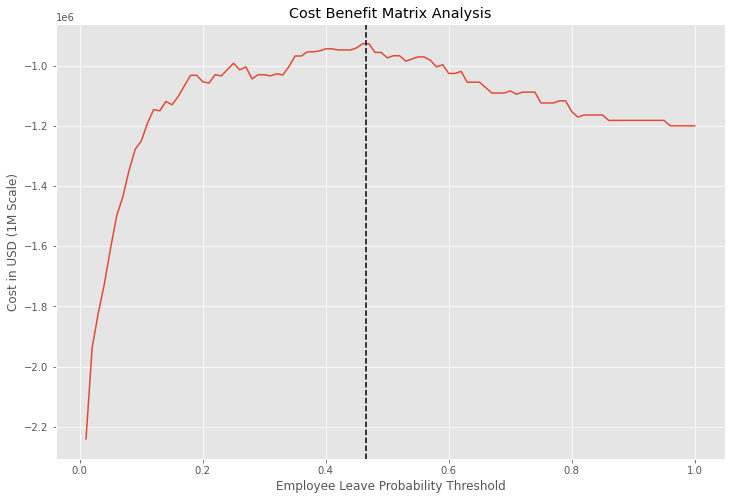

In [24]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("Cost Benefit Matrix Analysis")
ax.set_xlabel('Employee Leave Probability Threshold')
ax.set_ylabel('Cost in USD (1M Scale)')
ax.plot(thresh_list_new, profit_list)
plt.axvline(x=0.465, color='k', ls='--')
# ax.set_ylim(-8415000, -200000, 100000)
plt.show()

In [ ]:
df.head()

In [ ]:
gb_optimal = GradientBoostingClassifier(n_estimators= 1000, min_samples_split = 2, min_samples_leaf = 1,
                                         max_depth = 1, learning_rate = 0.1)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

In [ ]:
gb_optimal.fit(X_train, y_train)

In [ ]:
y_pred = gb_optimal.predict(X_test)

In [ ]:
importances = gb_optimal.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot